In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


weekdata = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Veckodata Riket')


#v_data

#v_data.info()   
#v_data.describe()
#v_data.value_counts()
#v_data.head()
#v_data.index
weekdata.columns


Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [60]:

week = weekdata["år"].astype(str) + 'v' + weekdata["veckonummer"].astype(str)

weekdata.insert(2, "vecka",  week)

weekdata


,år,veckonummer,vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022,38,2022v38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022,39,2022v39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022,40,2022v40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022,41,2022v41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


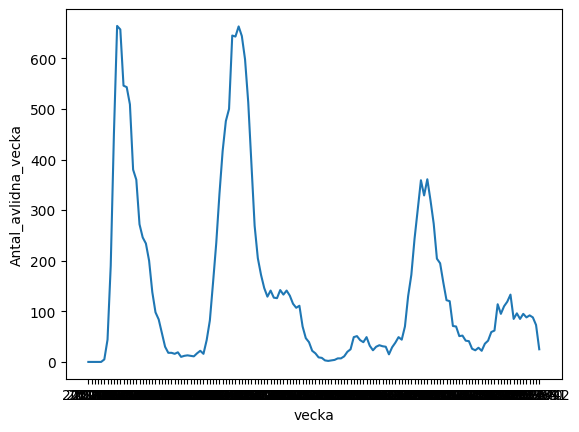

In [63]:

#Avlidna per vecka

sns.lineplot(x="vecka", y="Antal_avlidna_vecka", data=weekdata)
plt.show()


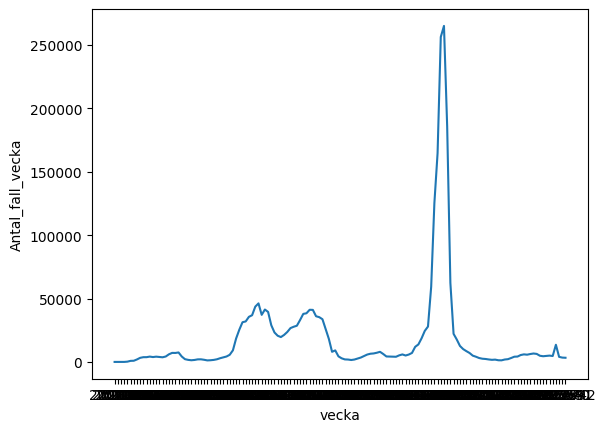

In [64]:

#Avlidna fall per vecka


sns.lineplot(x="vecka", y="Antal_fall_vecka", data=weekdata)
plt.show()




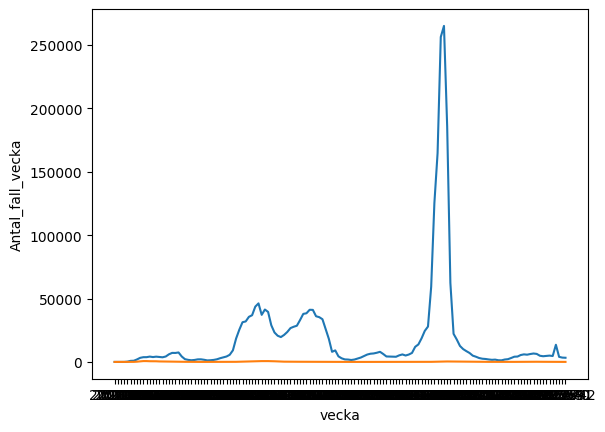

In [80]:
#deaths_and_cases = weekdata[["vecka", "Antal_fall_vecka", "Antal_avlidna_vecka"]]
#columns = ["Antal_fall_vecka", "Antal_avlidna_vecka"]

sns.lineplot(data=weekdata, x="vecka", y="Antal_fall_vecka")
sns.lineplot(data=weekdata, x="vecka", y="Antal_avlidna_vecka")

plt.show()



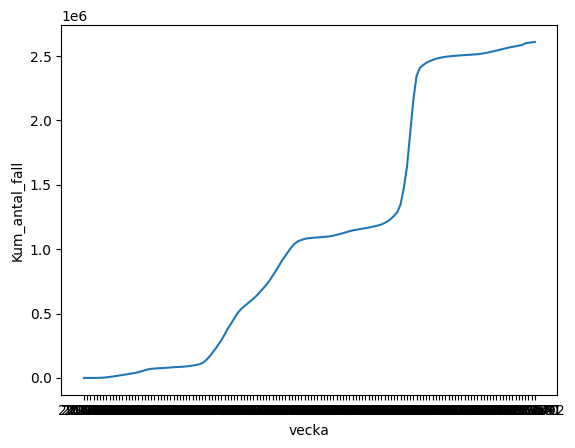

In [83]:
sns.lineplot(x="vecka", y="Kum_antal_fall", data=weekdata)
plt.show()

In [127]:
vaxx_data = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun och ålder')

län_count = vaxx_data["Län_namn"].nunique()
kommun_count = vaxx_data["Kommun_namn"].nunique()

befolkning = vaxx_data["Befolkning"].sum()

befolkning

#län_count


9092790

In [142]:
under_18 = vaxx_data.loc[vaxx_data["Ålder"].isin(['12-15', '16-17'])]

under_18#[["Kommun_namn", "Ålder", "Befolkning"]]


,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
10,1,Stockholms län,115,Vallentuna,12-15,2109,1196,1069,NaN,NaN,0.567093,0.506875,NaN,NaN
11,1,Stockholms län,115,Vallentuna,16-17,1014,841,768,NaN,NaN,0.829389,0.757396,NaN,NaN
20,1,Stockholms län,117,Österåker,12-15,2655,1477,1270,NaN,NaN,0.556309,0.478343,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,25,Norrbottens län,2582,Boden,16-17,573,494,467,NaN,NaN,0.862129,0.815009,NaN,NaN
2880,25,Norrbottens län,2583,Haparanda,12-15,452,198,186,NaN,NaN,0.438053,0.411504,NaN,NaN
2881,25,Norrbottens län,2583,Haparanda,16-17,225,163,154,NaN,NaN,0.724444,0.684444,NaN,NaN
2890,25,Norrbottens län,2584,Kiruna,12-15,954,465,441,NaN,NaN,0.487421,0.462264,NaN,NaN
